In [292]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [293]:
import yfinance as yf
import pandas as pd
import os
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

In [294]:
import hopsworks
import pandas as pd

In [295]:
project = hopsworks.login()
fs = project.get_feature_store()

Connection closed.
Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/210070
Connected. Call `.close()` to terminate connection gracefully.


In [330]:
import os
import pandas as pd
import yfinance as yf

# Check if the file exists
if os.path.exists("sp500.csv"):
    # If it exists, read the data from the file
    sp500 = pd.read_csv("sp500.csv", index_col=0)
    print("The csv file already exists.")
else:
    try:
        # If it doesn't exist, download data from Yahoo Finance
        sp500 = yf.Ticker("^GSPC")
        sp500 = sp500.history(period="max")
        
        # Save the downloaded data to a CSV file
        sp500.to_csv("sp500.csv")
        print("Data downloaded and saved successfully.")
    except Exception as e:
        print(f"Error: {e}")
        # Handle the exception, e.g., log the error or exit the program

# Now you can use the 'sp500' variable for further processing

Data downloaded and saved successfully.


In [331]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-29 00:00:00-05:00,4782.879883,4788.430176,4751.990234,4769.830078,3126060000,0.0,0.0
2024-01-02 00:00:00-05:00,4745.200195,4754.330078,4722.669922,4742.830078,3743050000,0.0,0.0
2024-01-03 00:00:00-05:00,4725.069824,4729.290039,4699.709961,4704.810059,3950760000,0.0,0.0


In [332]:
sp500.index = pd.to_datetime(sp500.index)
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2023-12-21 00:00:00-05:00', '2023-12-22 00:00:00-05:00',
               '2023-12-26 00:00:00-05:00', '2023-12-27 00:00:00-05:00',
               '2023-12-28 00:00:00-05:00', '2023-12-29 00:00:00-05:00',
               '2024-01-02 00:00:00-05:00', '2024-01-03 00:00:00-05:00',
               '2024-01-04 00:00:00-05:00', '2024-01-05 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24119, freq=None)

In [333]:
sp500['Date_Copy'] = sp500.index

In [334]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date_Copy
Date,,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0,1927-12-30 00:00:00-05:00
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0,1928-01-03 00:00:00-05:00
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0,1928-01-04 00:00:00-05:00
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0,1928-01-05 00:00:00-05:00
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0,1928-01-06 00:00:00-05:00
...,...,...,...,...,...,...,...,...
2023-12-29 00:00:00-05:00,4782.879883,4788.430176,4751.990234,4769.830078,3126060000,0.0,0.0,2023-12-29 00:00:00-05:00
2024-01-02 00:00:00-05:00,4745.200195,4754.330078,4722.669922,4742.830078,3743050000,0.0,0.0,2024-01-02 00:00:00-05:00
2024-01-03 00:00:00-05:00,4725.069824,4729.290039,4699.709961,4704.810059,3950760000,0.0,0.0,2024-01-03 00:00:00-05:00


<Axes: xlabel='Date'>

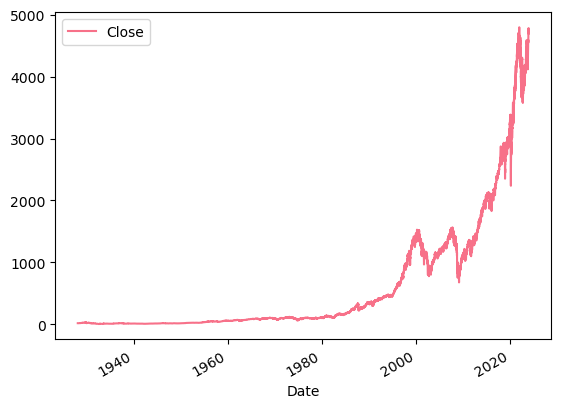

In [335]:
sp500.plot.line(y="Close", use_index=True)

In [336]:
#We feel that the columns "Dividends", "Stock Splits" are not relevant. So they are dropped.
sp500 = sp500.drop(columns=["Dividends", "Stock Splits"])

In [337]:
sp500

,Open,High,Low,Close,Volume,Date_Copy
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,1927-12-30 00:00:00-05:00
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,1928-01-03 00:00:00-05:00
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,1928-01-04 00:00:00-05:00
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,1928-01-05 00:00:00-05:00
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,1928-01-06 00:00:00-05:00
...,...,...,...,...,...,...
2023-12-29 00:00:00-05:00,4782.879883,4788.430176,4751.990234,4769.830078,3126060000,2023-12-29 00:00:00-05:00
2024-01-02 00:00:00-05:00,4745.200195,4754.330078,4722.669922,4742.830078,3743050000,2024-01-02 00:00:00-05:00
2024-01-03 00:00:00-05:00,4725.069824,4729.290039,4699.709961,4704.810059,3950760000,2024-01-03 00:00:00-05:00


In [338]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24119 entries, 1927-12-30 00:00:00-05:00 to 2024-01-05 00:00:00-05:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype                           
---  ------     --------------  -----                           
 0   Open       24119 non-null  float64                         
 1   High       24119 non-null  float64                         
 2   Low        24119 non-null  float64                         
 3   Close      24119 non-null  float64                         
 4   Volume     24119 non-null  int64                           
 5   Date_Copy  24119 non-null  datetime64[ns, America/New_York]
dtypes: datetime64[ns, America/New_York](1), float64(4), int64(1)
memory usage: 1.3 MB


In [339]:
# Check if there are any missing values before dropping
if sp500.isnull().any().sum() > 0:
    # Drop rows with missing values
    sp500 = sp500.dropna()

    # Verify if there are still any missing values
    print(sp500.isnull().sum())
else:
    print("No missing values to drop.")

No missing values to drop.


In [340]:
# sp500.isnull().any()
# sp500.isnull().any().sum()

In [341]:
sp500.isna().sum()

Open         0
High         0
Low          0
Close        0
Volume       0
Date_Copy    0
dtype: int64

In [342]:
sp500.describe()

,Open,High,Low,Close,Volume
count,24119.000000,24119.000000,24119.000000,24119.000000,2.411900e+04
mean,589.172618,612.712043,605.273042,609.226858,8.883597e+08
std,986.438484,980.790284,969.371187,975.435372,1.605259e+09
min,0.000000,4.400000,4.400000,4.400000,0.000000e+00
25%,9.620000,24.559999,24.559999,24.559999,1.490000e+06
50%,41.740002,102.540001,101.010002,101.820000,1.975000e+07
75%,993.730011,1003.019989,983.600006,994.175018,8.995000e+08
max,4804.509766,4818.620117,4780.979980,4796.560059,1.145623e+10


In [343]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [344]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [345]:
sp500 = sp500.loc["1990-01-01":].copy()

In [346]:
sp500.describe()

,Open,High,Low,Close,Volume,Tomorrow,Target
count,8569.000000,8569.000000,8569.000000,8569.000000,8.569000e+03,8568.000000,8569.000000
mean,1585.029643,1594.408100,1575.033431,1585.357203,2.459661e+09,1585.500254,0.534601
std,1091.182085,1097.047859,1084.994208,1091.351033,1.849277e+09,1091.334380,0.498830
min,295.450012,301.450012,294.510010,295.459991,1.499000e+07,295.459991,0.000000
25%,895.219971,905.840027,883.479980,896.239990,6.434600e+08,896.315018,0.000000
50%,1268.119995,1276.010010,1260.680054,1267.930054,2.502690e+09,1268.025024,1.000000
75%,2049.729980,2062.830078,2041.479980,2050.629883,3.831050e+09,2050.752441,1.000000
max,4804.509766,4818.620117,4780.979980,4796.560059,1.145623e+10,4796.560059,1.000000


In [347]:
sp500

,Open,High,Low,Close,Volume,Date_Copy,Tomorrow,Target
Date,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,1990-01-02 00:00:00-05:00,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,1990-01-03 00:00:00-05:00,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,1990-01-04 00:00:00-05:00,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,1990-01-05 00:00:00-05:00,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,1990-01-08 00:00:00-05:00,349.619995,0
...,...,...,...,...,...,...,...,...
2023-12-29 00:00:00-05:00,4782.879883,4788.430176,4751.990234,4769.830078,3126060000,2023-12-29 00:00:00-05:00,4742.830078,0
2024-01-02 00:00:00-05:00,4745.200195,4754.330078,4722.669922,4742.830078,3743050000,2024-01-02 00:00:00-05:00,4704.810059,0
2024-01-03 00:00:00-05:00,4725.069824,4729.290039,4699.709961,4704.810059,3950760000,2024-01-03 00:00:00-05:00,4688.680176,0


In [348]:
# Calculate the correlation between each feature and the target variable
correlations = sp500.corr()['Target'].abs().sort_values(ascending=False)
print(correlations)

Target       1.000000
Date_Copy    0.010510
Volume       0.009093
Tomorrow     0.008170
Close        0.003363
High         0.003083
Low          0.002908
Open         0.002823
Name: Target, dtype: float64


               Open      High       Low     Close    Volume  Date_Copy  \
Open       1.000000  0.999946  0.999921  0.999861  0.603213   0.878505   
High       0.999946  1.000000  0.999896  0.999927  0.604575   0.878563   
Low        0.999921  0.999896  1.000000  0.999935  0.601043   0.878393   
Close      0.999861  0.999927  0.999935  1.000000  0.602746   0.878495   
Volume     0.603213  0.604575  0.601043  0.602746  1.000000   0.826548   
Date_Copy  0.878505  0.878563  0.878393  0.878495  0.826548   1.000000   
Tomorrow   0.999689  0.999750  0.999757  0.999804  0.602784   0.878486   
Target    -0.002823 -0.003083 -0.002908 -0.003363  0.009093   0.010510   

           Tomorrow    Target  
Open       0.999689 -0.002823  
High       0.999750 -0.003083  
Low        0.999757 -0.002908  
Close      0.999804 -0.003363  
Volume     0.602784  0.009093  
Date_Copy  0.878486  0.010510  
Tomorrow   1.000000  0.008170  
Target     0.008170  1.000000  


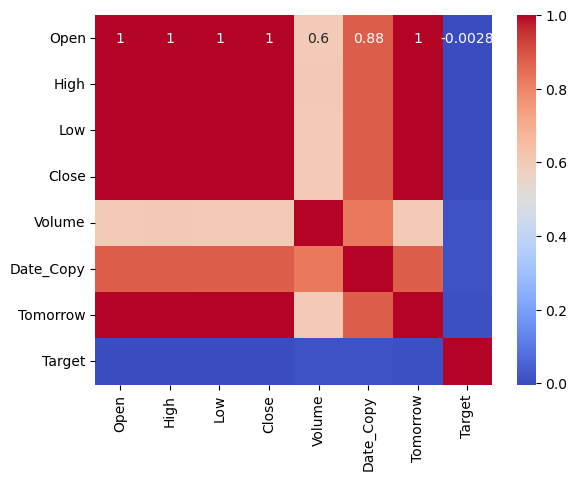

In [349]:
# Checking for correlation between all the columns
# Creating the correlation matrix of the dataset
temp_corr_matrix = sp500.corr()
print(temp_corr_matrix)

# Create the heatmap using the `heatmap` function of Seaborn
sns.heatmap(temp_corr_matrix, cmap='coolwarm', annot=True)

# Display the heatmap using the `show` method of the `pyplot` module from matplotlib.
plt.show()

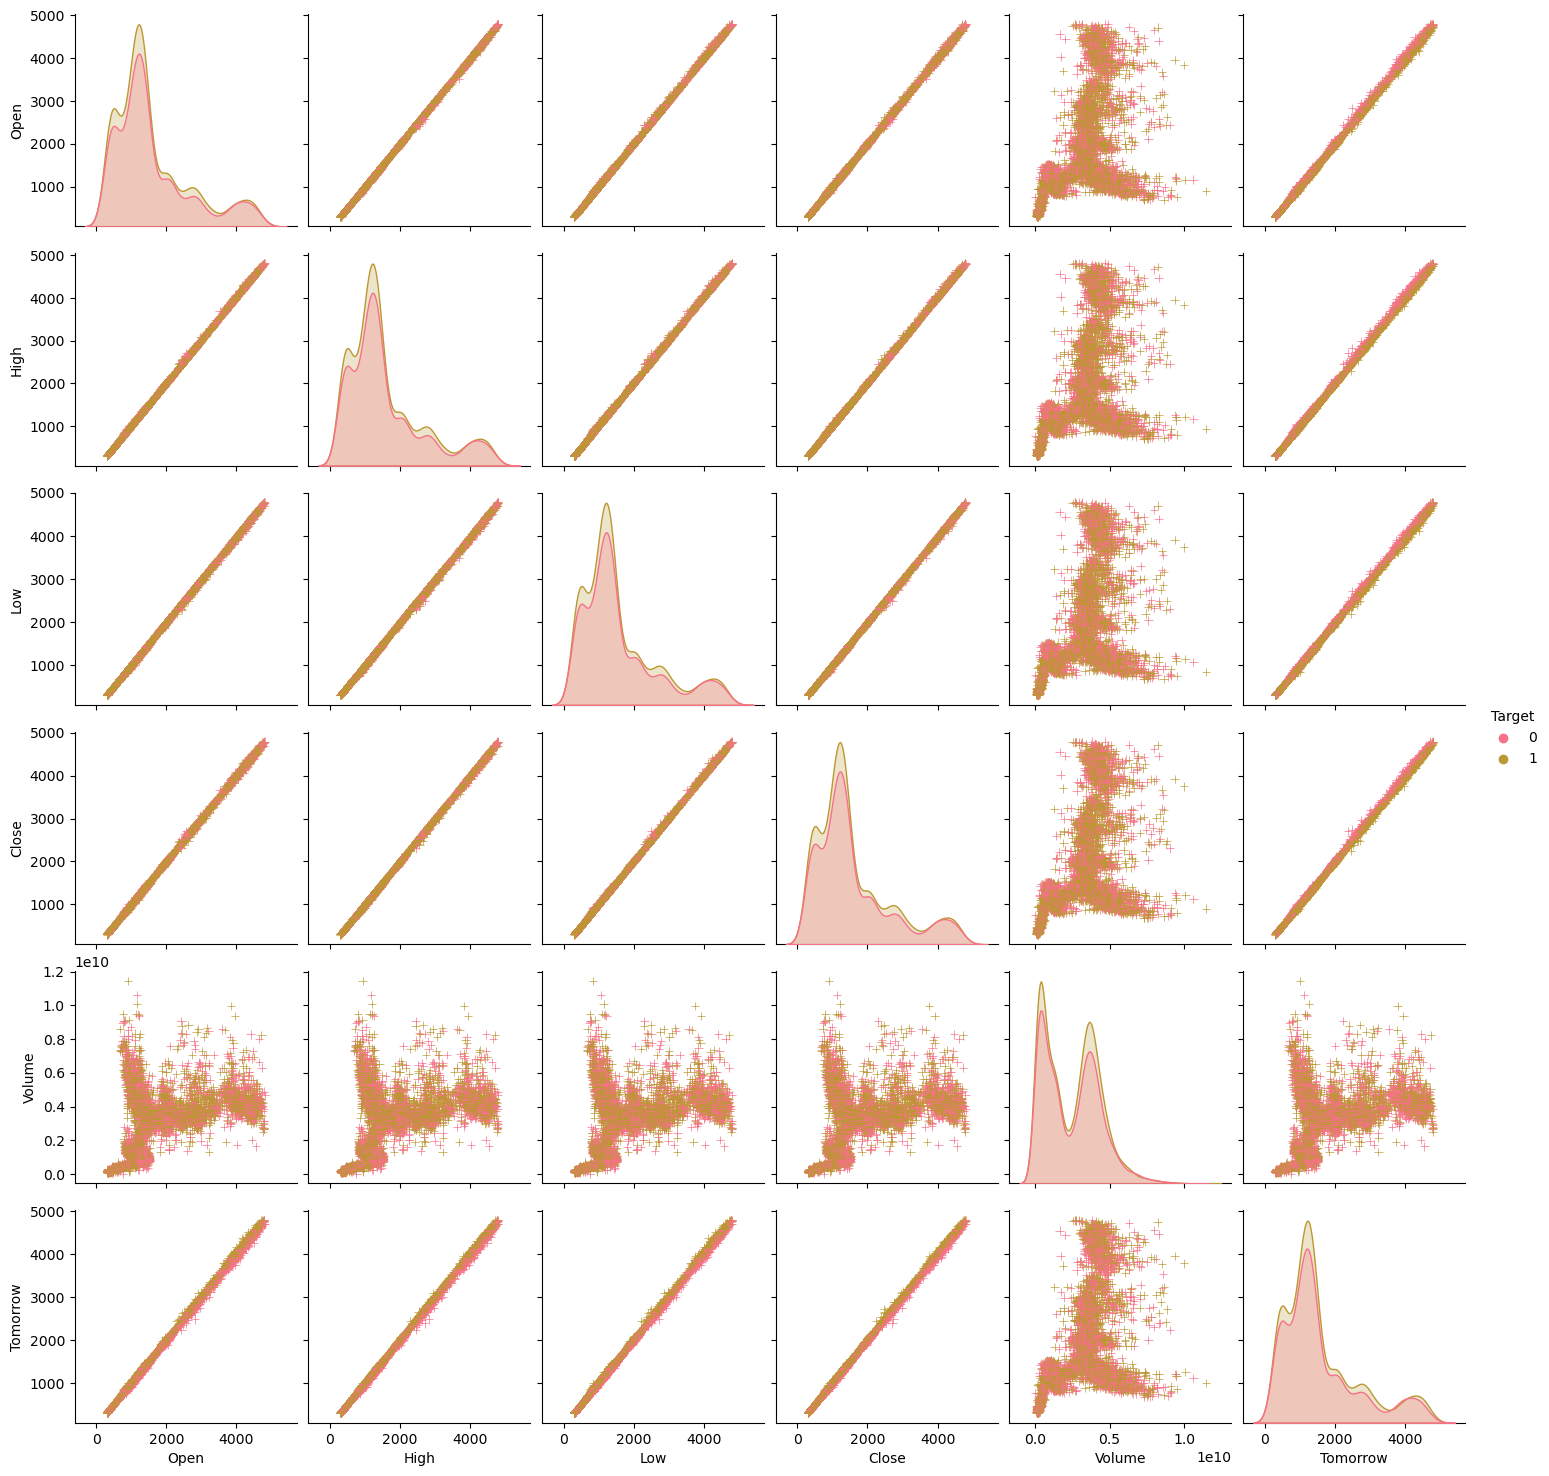

In [350]:
# Pairplot
g = sns.pairplot(sp500, hue='Target', markers='+')
plt.show()

In [353]:
# Rename columns to comply with Hopsworks Feature Store naming conventions
sp500.columns = sp500.columns.str.lower()  # Convert to lowercase

#Trying to increase the features, for improved backtesting
df_sp500 = sp500.copy()
print(df_sp500.columns)
df_sp500 = df_sp500.reset_index(drop=True)
date_copy=df_sp500['date_copy'].copy()
#df_sp500 = df_sp500.drop(columns=['date_copy'])

Index(['open', 'high', 'low', 'close', 'volume', 'date_copy', 'tomorrow',
       'target'],
      dtype='object')


In [355]:
df_sp500

,open,high,low,close,volume,date_copy,tomorrow,target
0,353.399994,359.690002,351.980011,359.690002,162070000,1990-01-02 00:00:00-05:00,358.760010,0
1,359.690002,360.589996,357.890015,358.760010,192330000,1990-01-03 00:00:00-05:00,355.670013,0
2,358.760010,358.760010,352.890015,355.670013,177000000,1990-01-04 00:00:00-05:00,352.200012,0
3,355.670013,355.670013,351.350006,352.200012,158530000,1990-01-05 00:00:00-05:00,353.790009,1
4,352.200012,354.239990,350.540009,353.790009,140110000,1990-01-08 00:00:00-05:00,349.619995,0
...,...,...,...,...,...,...,...,...
8564,4782.879883,4788.430176,4751.990234,4769.830078,3126060000,2023-12-29 00:00:00-05:00,4742.830078,0
8565,4745.200195,4754.330078,4722.669922,4742.830078,3743050000,2024-01-02 00:00:00-05:00,4704.810059,0
8566,4725.069824,4729.290039,4699.709961,4704.810059,3950760000,2024-01-03 00:00:00-05:00,4688.680176,0
8567,4697.419922,4726.779785,4687.529785,4688.680176,3715480000,2024-01-04 00:00:00-05:00,4697.240234,1


In [356]:
# horizons = [2,5,60,250,1000]
# new_predictors = []

# for horizon in horizons:
#     rolling_averages = df_sp500.rolling(horizon).mean()
    
#     ratio_column = f"close_ratio_{horizon}"
#     df_sp500[ratio_column] = df_sp500["close"] / rolling_averages["close"]
    
#     trend_column = f"trend_{horizon}"
#     df_sp500[trend_column] = df_sp500.shift(1).rolling(horizon).sum()["target"]
    
#     new_predictors+= [ratio_column, trend_column]

df_sp500['date_copy']=date_copy.copy()

In [357]:
df_sp500

,open,high,low,close,volume,date_copy,tomorrow,target
0,353.399994,359.690002,351.980011,359.690002,162070000,1990-01-02 00:00:00-05:00,358.760010,0
1,359.690002,360.589996,357.890015,358.760010,192330000,1990-01-03 00:00:00-05:00,355.670013,0
2,358.760010,358.760010,352.890015,355.670013,177000000,1990-01-04 00:00:00-05:00,352.200012,0
3,355.670013,355.670013,351.350006,352.200012,158530000,1990-01-05 00:00:00-05:00,353.790009,1
4,352.200012,354.239990,350.540009,353.790009,140110000,1990-01-08 00:00:00-05:00,349.619995,0
...,...,...,...,...,...,...,...,...
8564,4782.879883,4788.430176,4751.990234,4769.830078,3126060000,2023-12-29 00:00:00-05:00,4742.830078,0
8565,4745.200195,4754.330078,4722.669922,4742.830078,3743050000,2024-01-02 00:00:00-05:00,4704.810059,0
8566,4725.069824,4729.290039,4699.709961,4704.810059,3950760000,2024-01-03 00:00:00-05:00,4688.680176,0
8567,4697.419922,4726.779785,4687.529785,4688.680176,3715480000,2024-01-04 00:00:00-05:00,4697.240234,1


In [358]:
df_sp500 = df_sp500.drop(columns=["tomorrow","target"])

In [359]:
df_sp500 = df_sp500.dropna(subset=df_sp500.columns[df_sp500.columns != "tomorrow"])
df_sp500 = df_sp500.reset_index(drop=True)
df_sp500

,open,high,low,close,volume,date_copy
0,353.399994,359.690002,351.980011,359.690002,162070000,1990-01-02 00:00:00-05:00
1,359.690002,360.589996,357.890015,358.760010,192330000,1990-01-03 00:00:00-05:00
2,358.760010,358.760010,352.890015,355.670013,177000000,1990-01-04 00:00:00-05:00
3,355.670013,355.670013,351.350006,352.200012,158530000,1990-01-05 00:00:00-05:00
4,352.200012,354.239990,350.540009,353.790009,140110000,1990-01-08 00:00:00-05:00
...,...,...,...,...,...,...
8564,4782.879883,4788.430176,4751.990234,4769.830078,3126060000,2023-12-29 00:00:00-05:00
8565,4745.200195,4754.330078,4722.669922,4742.830078,3743050000,2024-01-02 00:00:00-05:00
8566,4725.069824,4729.290039,4699.709961,4704.810059,3950760000,2024-01-03 00:00:00-05:00
8567,4697.419922,4726.779785,4687.529785,4688.680176,3715480000,2024-01-04 00:00:00-05:00


In [360]:
# # Now create the feature group
# sp500_fg = fs.get_or_create_feature_group(
#     name="sp500",
#     version=2,
#     primary_key=["open","high","low","close","volume","tomorrow","date_Copy"],
#     description="sp500 dataset",
# )
# sp500_fg.insert(sp500)

# Now create the feature group
sp500_fg = fs.get_or_create_feature_group(
    name="sp500",
    version=2,
    primary_key=["open","high","low","close","volume","date_copy"],
    description="sp500 dataset",
)
sp500_fg.insert(df_sp500)


Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/210070/fs/209989/fg/394606


Uploading Dataframe: 100.00% |█| Rows 8569/8569 | Elapsed Time: 00:06 | Remainin


Launching job: sp500_2_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/210070/jobs/named/sp500_2_offline_fg_materialization/executions


(<hsfs.core.job.Job at 0x7fd5d1e4afa0>, None)

In [361]:
df_sp500.columns

Index(['open', 'high', 'low', 'close', 'volume', 'date_copy'], dtype='object')